In [38]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

batch_size = 32
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data',train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data',train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle=False)

# Demo

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

batch_size = 64
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data',train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.FashionMNIST(root='./data',train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle=False)


In [11]:
class DNN_Two_Layer(nn.Module):
    def __init__(self):
        super(DNN_Two_Layer, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 100)
        self.output = nn.Linear(100, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28) # 1-D array
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x
def ACC(epochs):
    model = DNN_Two_Layer()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()    
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    train_ACC = correct / total

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_ACC = correct / total
    return train_ACC, test_ACC
train_acc, test_acc = ACC(10)
print('train_ACC:', train_acc, 'test_ACC:', test_acc)
  

train_ACC: 0.9119166666666667 test_ACC: 0.8794


# Part I Q1

In [39]:
class DNN_Single_Layer(nn.Module):
    def __init__(self, neurons_num):
        super(DNN_Single_Layer, self).__init__()
        self.fc = nn.Linear(28*28, neurons_num)
        self.output = nn.Linear(neurons_num, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28) # 1-D array
        x = F.relu(self.fc(x))
        x = self.output(x)
        return x

neurons_num: 5 train_ACC: 0.89865 test_ACC: 0.8974
neurons_num: 10 train_ACC: 0.94225 test_ACC: 0.9339
neurons_num: 20 train_ACC: 0.9677 test_ACC: 0.9566
neurons_num: 50 train_ACC: 0.9901 test_ACC: 0.9734
neurons_num: 75 train_ACC: 0.9948 test_ACC: 0.9757
neurons_num: 100 train_ACC: 0.9949 test_ACC: 0.974


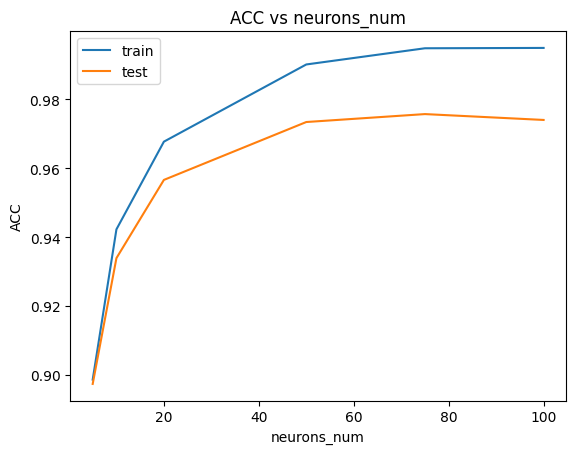

In [26]:

def ACC(neurons_num, epochs):
    model = DNN_Single_Layer(neurons_num)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    train_ACC = correct / total

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_ACC = correct / total
    return train_ACC, test_ACC

num = [5, 10, 20, 50, 75, 100]
train_ACC = []
test_ACC = []

for i in num:
    train_acc, test_acc = ACC(i, 10)
    train_ACC.append(train_acc)
    test_ACC.append(test_acc)
    print('neurons_num:', i, 'train_ACC:', train_acc, 'test_ACC:', test_acc)

plt.plot(num, train_ACC, label='train')
plt.plot(num, test_ACC, label='test')
plt.xlabel('neurons_num')
plt.ylabel('ACC')
plt.title('ACC vs neurons_num')
plt.legend()
plt.show()

# Part I Q2

train_data_num: 1000 train_ACC: 0.99 test_ACC: 0.8769
train_data_num: 5000 train_ACC: 0.9872 test_ACC: 0.9246
train_data_num: 10000 train_ACC: 0.9908 test_ACC: 0.9454
train_data_num: 15000 train_ACC: 0.9921333333333333 test_ACC: 0.9577
train_data_num: 20000 train_ACC: 0.9939 test_ACC: 0.9668
train_data_num: 25000 train_ACC: 0.996 test_ACC: 0.9701
train_data_num: 30000 train_ACC: 0.9957666666666667 test_ACC: 0.9707
train_data_num: 35000 train_ACC: 0.9950285714285714 test_ACC: 0.9724
train_data_num: 40000 train_ACC: 0.9955 test_ACC: 0.9727
train_data_num: 45000 train_ACC: 0.9943777777777778 test_ACC: 0.976
train_data_num: 50000 train_ACC: 0.99386 test_ACC: 0.9752
train_data_num: 55000 train_ACC: 0.9933636363636363 test_ACC: 0.975
train_data_num: 60000 train_ACC: 0.9944 test_ACC: 0.9772


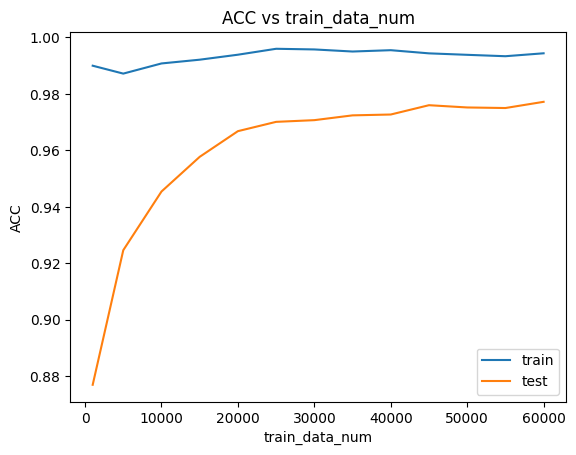

In [27]:
class DNN_Two_Layer(nn.Module):
    def __init__(self):
        super(DNN_Two_Layer, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 100)
        self.output = nn.Linear(100, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28) # 1-D array
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x
def ACC(train_data_num, epochs):
    subset_trainset = torch.utils.data.Subset(trainset, list(range(train_data_num)))
    trainloader = torch.utils.data.DataLoader(subset_trainset, batch_size=batch_size, shuffle=True)
    model = DNN_Two_Layer()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    train_ACC = correct / total

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_ACC = correct / total
    return train_ACC, test_ACC      

num = [ 1000,  5000, 10000 , 15000 , 20000 , 25000 , 30000 , 35000 , 40000 , 45000 , 50000 , 55000 , 60000]
train_ACC = []
test_ACC = []
for i in num:
    train_acc, test_acc = ACC(i, 10)
    train_ACC.append(train_acc)
    test_ACC.append(test_acc)
    print('train_data_num:', i, 'train_ACC:', train_acc, 'test_ACC:', test_acc)

plt.plot(num, train_ACC, label='train')
plt.plot(num, test_ACC, label='test')
plt.xlabel('train_data_num')
plt.ylabel('ACC')
plt.title('ACC vs train_data_num')
plt.legend()
plt.show()

# Part I Q3

layers: 1 train_ACC: 0.9957666666666667 test_ACC: 0.9783
layers: 2 train_ACC: 0.99545 test_ACC: 0.9767
layers: 3 train_ACC: 0.9935166666666667 test_ACC: 0.9772
layers: 4 train_ACC: 0.99015 test_ACC: 0.9737
layers: 5 train_ACC: 0.9943333333333333 test_ACC: 0.9778


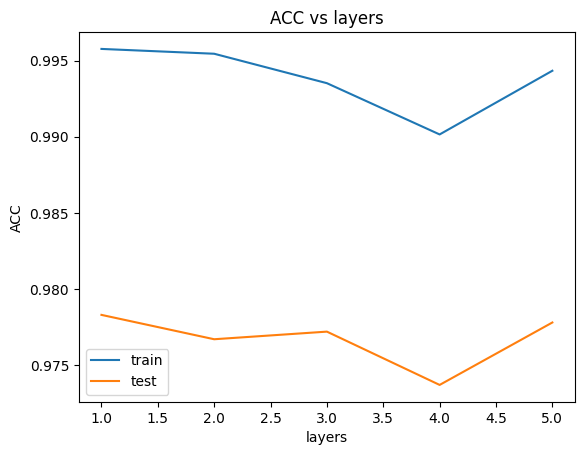

In [28]:
class DNN_multi_layer(nn.Module):
    def __init__(self, layers):
        super(DNN_multi_layer, self).__init__()
        self.fc = nn.ModuleList()
        self.fc.append(nn.Linear(28*28, 100))
        for i in range(1, layers):
            self.fc.append(nn.Linear(100, 100))
        self.output = nn.Linear(100, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28) # 1-D array
        for i in range(len(self.fc)):
            x = F.relu(self.fc[i](x))
        x = self.output(x)
        return x
def ACC(layers, epochs):
    model = DNN_multi_layer(layers)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    train_ACC = correct / total

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_ACC = correct / total
    return train_ACC, test_ACC

num = [1, 2, 3, 4, 5]
train_ACC = []
test_ACC = []
for i in num:
    train_acc, test_acc = ACC(i, 10)
    train_ACC.append(train_acc)
    test_ACC.append(test_acc)
    print('layers:', i, 'train_ACC:', train_acc, 'test_ACC:', test_acc)

plt.plot(num, train_ACC, label='train')
plt.plot(num, test_ACC, label='test')
plt.xlabel('layers')
plt.ylabel('ACC')
plt.title('ACC vs layers')
plt.legend()
plt.show()

# Bounus different epochs

epochs: 1 train_ACC: 0.9532 test_ACC: 0.9511
epochs: 2 train_ACC: 0.9714 test_ACC: 0.966
epochs: 3 train_ACC: 0.9765333333333334 test_ACC: 0.9688
epochs: 4 train_ACC: 0.9829166666666667 test_ACC: 0.9743
epochs: 5 train_ACC: 0.9876333333333334 test_ACC: 0.9744
epochs: 6 train_ACC: 0.99015 test_ACC: 0.9773
epochs: 7 train_ACC: 0.9864833333333334 test_ACC: 0.9691
epochs: 8 train_ACC: 0.9930333333333333 test_ACC: 0.977
epochs: 9 train_ACC: 0.9946333333333334 test_ACC: 0.9772
epochs: 10 train_ACC: 0.9941333333333333 test_ACC: 0.9748
epochs: 11 train_ACC: 0.9972833333333333 test_ACC: 0.9772
epochs: 12 train_ACC: 0.99705 test_ACC: 0.9764
epochs: 13 train_ACC: 0.9963166666666666 test_ACC: 0.9761
epochs: 14 train_ACC: 0.9976833333333334 test_ACC: 0.9787
epochs: 15 train_ACC: 0.9970166666666667 test_ACC: 0.9771


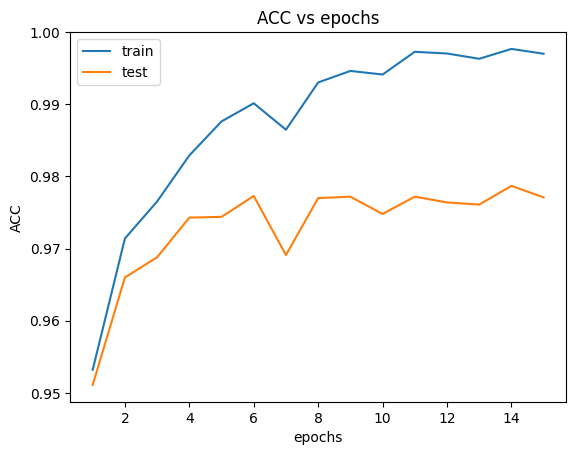

In [40]:
def ACC(neurons_num, epochs):
    model = DNN_Single_Layer(neurons_num)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    train_ACC = correct / total

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_ACC = correct / total
    return train_ACC, test_ACC

num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
train_ACC = []
test_ACC = []
for i in num:
    train_acc, test_acc = ACC(100, i)
    train_ACC.append(train_acc)
    test_ACC.append(test_acc)
    print('epochs:', i, 'train_ACC:', train_acc, 'test_ACC:', test_acc)

plt.plot(num, train_ACC, label='train')
plt.plot(num, test_ACC, label='test')
plt.xlabel('epochs')
plt.ylabel('ACC')
plt.title('ACC vs epochs')
plt.legend()
plt.show()

# Bounus II comparing Adam and SGD

In [42]:
def ACC_adam(neurons_num, epochs):
    model = DNN_Single_Layer(neurons_num)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    train_ACC = correct / total

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_ACC = correct / total
    return train_ACC, test_ACC

def ACC_SGD(neurons_num, epochs):
    model = DNN_Single_Layer(neurons_num)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001)
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    train_ACC = correct / total
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_ACC = correct / total
    return train_ACC, test_ACC



train_acc_adam, test_acc_adam = ACC_adam(100, 10)
print('ADAM : train_ACC:', train_acc_adam, 'test_ACC:', test_acc_adam)
train_acc_SGD, test_acc_SGD = ACC_SGD(100, 10)
print('SGD : train_ACC:', train_acc_SGD, 'test_ACC:', test_acc_SGD)



ADAM : train_ACC: 0.9950666666666667 test_ACC: 0.9772
SGD : train_ACC: 0.8866166666666667 test_ACC: 0.893


# Part II

In [29]:
class DNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 100)
        self.fc2 = nn.Linear(100, 100)
        self.output = nn.Linear(100, num_classes)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

def evaluateACC(model, loader):
    model.eval()
    correct = 0
    total = 0
    T = np.zeros((4,4))
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            for i in range(labels.size(0)):
                T[labels[i], predicted[i]] += 1

    accuracy = correct / total
    return accuracy, T

In [30]:
EPOCHS = 10
train = pd.read_csv('HW2_training.csv')
test = pd.read_csv('HW2_testing.csv')
x_train = train.iloc[:, 1:].values
y_trian = train.iloc[:, 0].values
x_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_trian, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size = 64, shuffle=False)

model = DNN(2, 4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(EPOCHS):
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

ACC_train , Confuse_train= evaluateACC(model, trainloader)
ACC_test , Confuse_test= evaluateACC(model, testloader)
print(f'Training Accuracy: {ACC_train}')
print("Train Confusion Matrix:\n", Confuse_train)
print(f'Test Accuracy: {ACC_test}')
print("Test Confusion Matrix:\n", Confuse_test)

Training Accuracy: 0.9423076923076923
Train Confusion Matrix:
 [[285.   6.   9.   0.]
 [ 10. 225.   1.  14.]
 [  6.   2. 332.  10.]
 [  0.  11.   6. 383.]]
Test Accuracy: 0.908
Test Confusion Matrix:
 [[186.   9.   5.   0.]
 [  6. 268.   1.  25.]
 [  7.   0. 135.   8.]
 [  0.   2.   6.  92.]]


# Drawing Decision Boundary

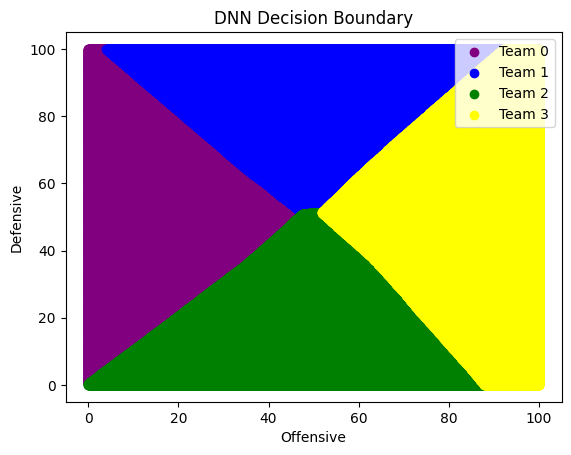

In [31]:
class_colors = {0: "purple", 1: "blue", 2: "green", 3: "yellow"}


num = 1000
x1 = np.linspace(0, 100, num)
x2 = np.linspace(0, 100, num)
x = np.array([(i,j) for j in x1 for i in x2])
x_norm = scaler.transform(x)
x = x.reshape((num,num,2))
x_norm = x_norm.reshape((num,num,2))

grid = x_norm.reshape(-1, 2)
grid = torch.tensor(grid, dtype=torch.float32)
with torch.no_grad():
    outputs = model(grid)
    _, result = torch.max(outputs, 1)
result = result.numpy().reshape(num, num)

plt.figure(0)
for i in range(4):
    plt.scatter(x[result == i][:, 0], x[result == i][:, 1], color=class_colors[i], label=f"Team {i}")
plt.legend(loc = "upper right")
plt.xlabel("Offensive")
plt.ylabel("Defensive")
plt.title("DNN Decision Boundary")
plt.show()

